# Principles of Data Science

### Lecture 6: Common distributions

_MPhil in Data Intensive Science_

**University of Cambridge**

<h2 style="color: blue">Matt Kenzie</h2>

[mk652@cam.ac.uk](mailto:mk652@cam.ac.uk)

## Common distributions

- Today's lecture covers some of the more common probability distributions

- Learning objectives:
    - Understand, be able to use, compute the properties of and manipulate the Binomial, Poisson, normal and multivariate-normal distributions

## Recap

- Recall p.d.f.s, c.d.f.s and the characteristic function
   - for random variable $X$
   - probability distribution described by $f(X)$
   - cumalative probability defined by 
   $$F(X) = \int_{-\infty}^{X} f(X') dX'$$
   - characteristic function defined by
   $$ \varphi_X(t) = E[ e^{iXt} ] $$ 

## Nomenclature on parameters of distributions

- A probability distirbution depends on some random variable(s), $X$
- But it will often also depends on some parameter(s), $\theta$
- For a Bayesian all <font color=blue>parameters are also random variables</font>
- For a frequentist <font color=blue>parameters are considered fixed</font>
- The way this is often written for a probability distribution is

$$ p(X; \theta) $$

## The binomial distribution

<font color="green">*Hand written notes*</font>

- For pass / fail experiments 

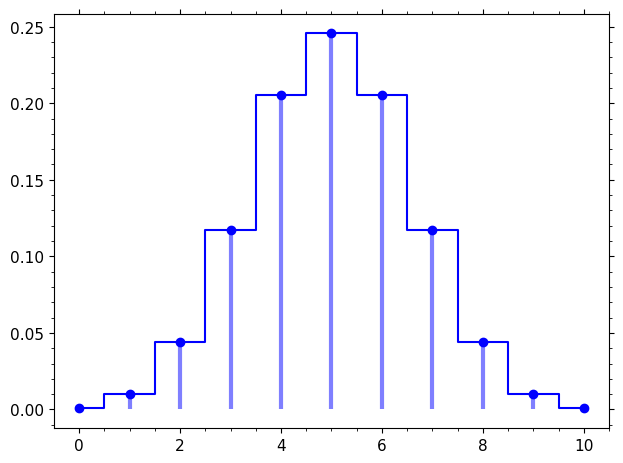

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
plt.style.use('../mphil.mplstyle')

k = np.arange(0,11)

y = binom.pmf(k, n=10,  p=0.5)

plt.plot(k, y, 'bo')
plt.vlines(k,0,y, ec='b', alpha=0.5, lw=3, ls='-')
plt.step(k, y, where='mid', c='b')



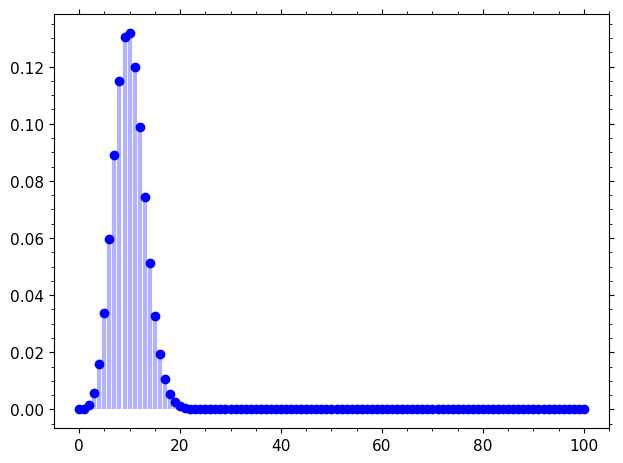

In [2]:
k = np.arange(0,101, 1)
y = binom.pmf(k, n=100, p=0.1)

plt.plot(k, y, 'bo')
plt.vlines(k, 0, y, ec='b', alpha=0.3, lw=3)

## The Poisson distribution

<font color="green">*Hand written notes*</font>

- Used for counting experiments

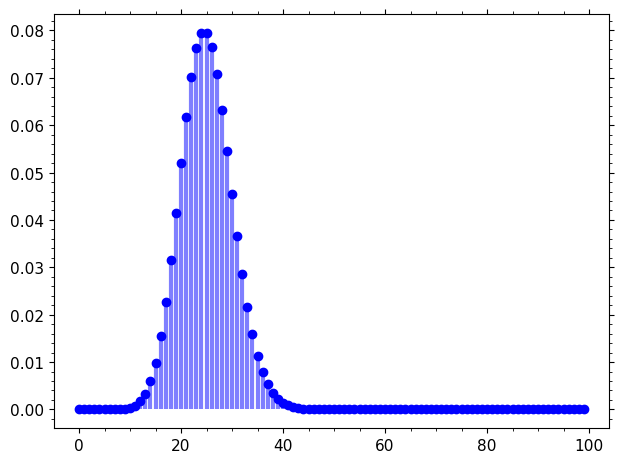

In [3]:
from scipy.stats import poisson

k = np.arange(0,100)

y = poisson.pmf(k, mu=25)

plt.plot(k, y, 'bo')
plt.vlines(k, 0, y, alpha=0.5, lw=3, ec='b')

## Discussion on histogram entries

- Bins in histograms are "counts" of events, $n_b$
- So the distribution <font color="red">within each bin</font> is Poisson
- Therefore standard deviation on bin entry is $\sqrt{n_b}$ 
- Recall discussion from Lecture 1 on errors with a weighting
    - Must store $\sum w_i^2$ *as well as* $\sum w_i$ in each bin

<ErrorbarContainer object of 3 artists>

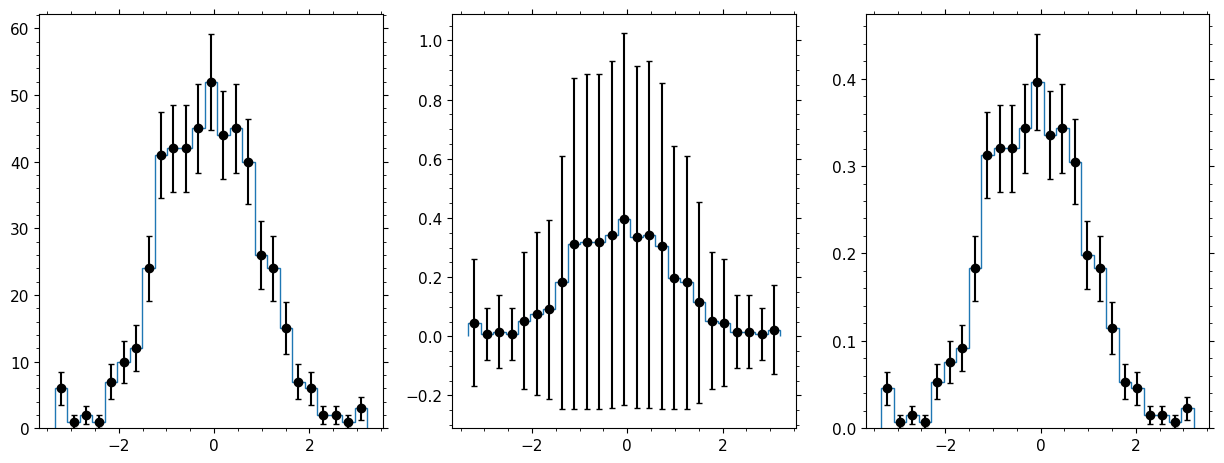

In [4]:
fig, ax = plt.subplots(1,3, figsize=(12.4,4.8))

data = np.random.normal(size=500)

# make histogram
nh, xe = np.histogram(data, bins=25)
cx = 0.5*(xe[:-1]+xe[1:])

# plot as event count
ax[0].stairs(nh, xe)
ax[0].errorbar( cx, nh, nh**0.5, fmt='ko' )

# plot as density using naive sqrt
nh, xe = np.histogram(data, bins=xe, density=True)
ax[1].stairs(nh, xe)
ax[1].errorbar( cx, nh, nh**0.5, fmt='ko' )

# plot as density with appropriate scaling
bw = np.diff(xe)
scf = len(data)*bw
ax[2].stairs(nh, xe)
ax[2].errorbar( cx, nh, (nh/scf)**0.5, fmt='ko' )

## The normal distribution

<font color="green">*Hand written notes*</font>

- Standard normal and shifted / scaled normal

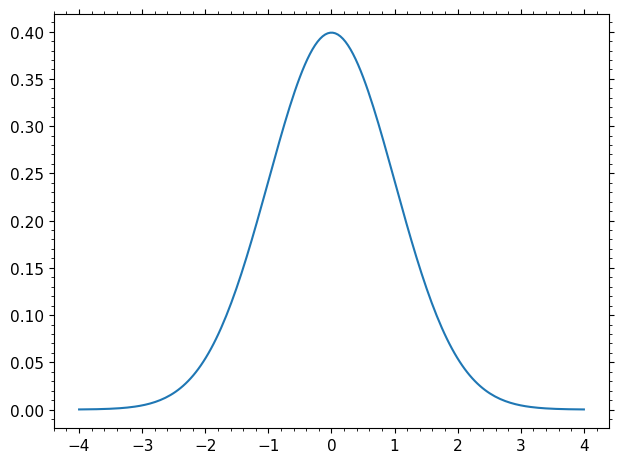

In [5]:
from scipy.stats import norm

x = np.linspace(-4,4,200)

plt.plot(x, norm.pdf(x))

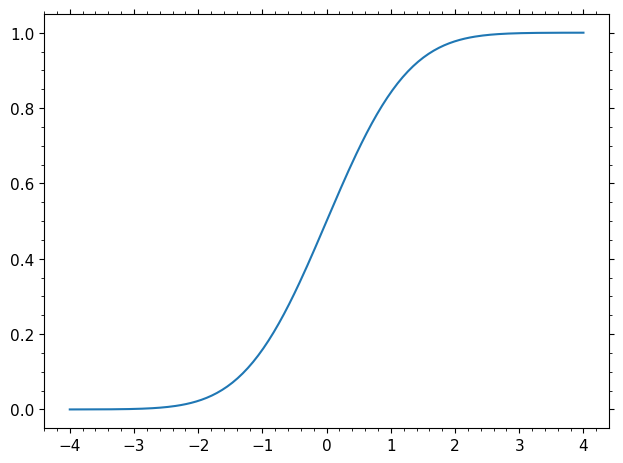

In [6]:
plt.plot(x, norm.cdf(x))

## Discussion of importance of normal c.d.f

 - Allows to read interval at given std deviation
 - We by convention quote "errors" as Gaussian and at 1 std deviation of a normal
 - I.e. error bars contain 68.3\% of the distribution
 
 <img src="plots/gaussian.png" alt="drawing">

In [7]:
from tabulate import tabulate
sigma = np.arange(1,6)
probs = norm.cdf(sigma) - norm.cdf(-sigma)
pvals = 1-probs

print( tabulate( zip(sigma,probs,pvals), headers=['nSigma','fContained','fOutside'] ))

  nSigma    fContained     fOutside
--------  ------------  -----------
       1      0.682689  0.317311
       2      0.9545    0.0455003
       3      0.9973    0.0026998
       4      0.999937  6.33425e-05
       5      0.999999  5.73303e-07


# <font color="darkred">*Musical interlude...*</font>

## The multi-variate normal distribution

<font color="green">*Hand written notes*</font>


In [8]:
from   

# make and freeze the mvn object
mu = [1,-2]
cov = [[1,1],[1,4]]
pdf = mvn(mu,cov)

# for demo compute sigmas and corr
sg = np.sqrt( np.diag(cov) )
invS = (1/sg).reshape((2,1))
corr = invS.T * cov * invS

print(sg)
print(corr)


[1. 2.]
[[1.  0.5]
 [0.5 1. ]]


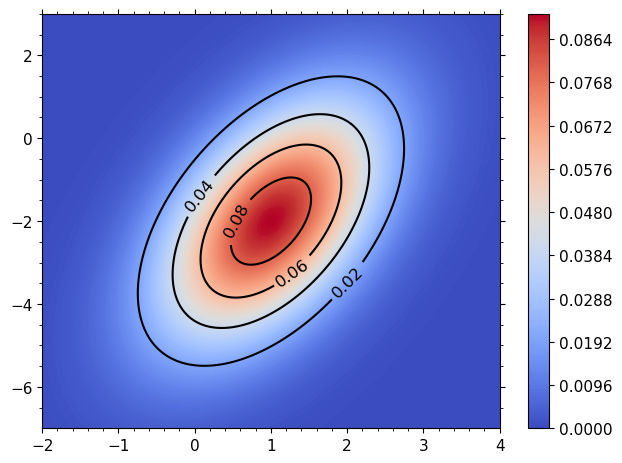

In [9]:
# make a grid of points to draw
x = np.linspace(-2,4,200)
y = np.linspace(-7,3,200)
X, Y = np.meshgrid(x,y)
x, y = X.T, Y.T
pos = np.dstack((x,y))

# evaluate grid and plot
z = pdf.pdf(pos)

im = plt.contourf(x, y, z, levels=250, cmap='coolwarm')
cs = plt.contour(x, y, z, levels=4, colors='k')
plt.clabel(cs, cs.levels, inline=True)
plt.colorbar(im)


## Marginal distributions of 2D normal

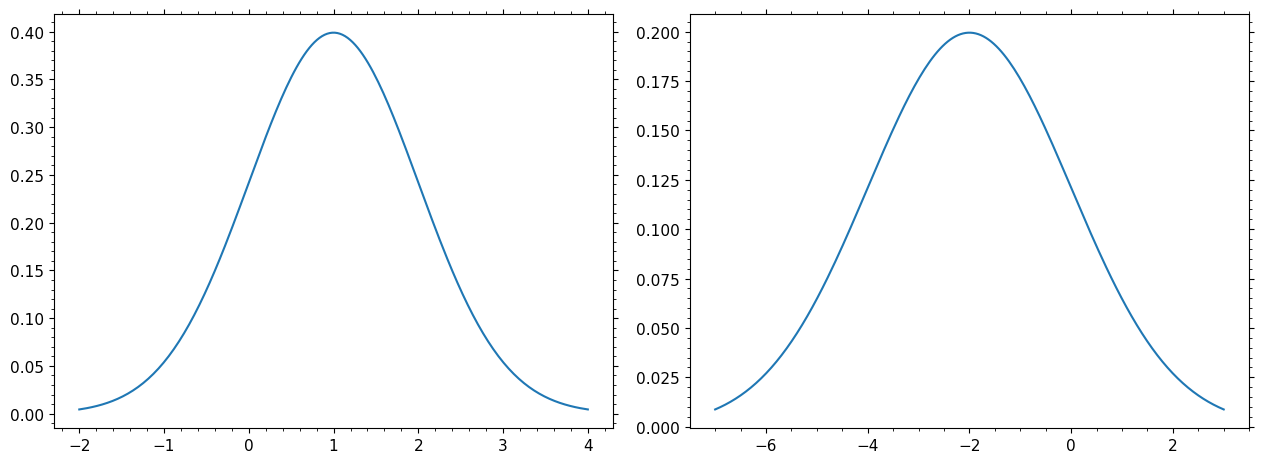

In [10]:
# Marginals
# f(X,Y) --> g(X) = int f(X,Y) dX 
X_marg = norm( mu[0], sg[0] )
Y_marg = norm( mu[1], sg[1] )

x = np.linspace(-2,4,200)
y = np.linspace(-7,3,200)
fig, ax = plt.subplots(1,2, figsize=(12.8,4.8))
ax[0].plot(x, X_marg.pdf(x))
ax[1].plot(y, Y_marg.pdf(y))

## Conditional distributions of 2D normal

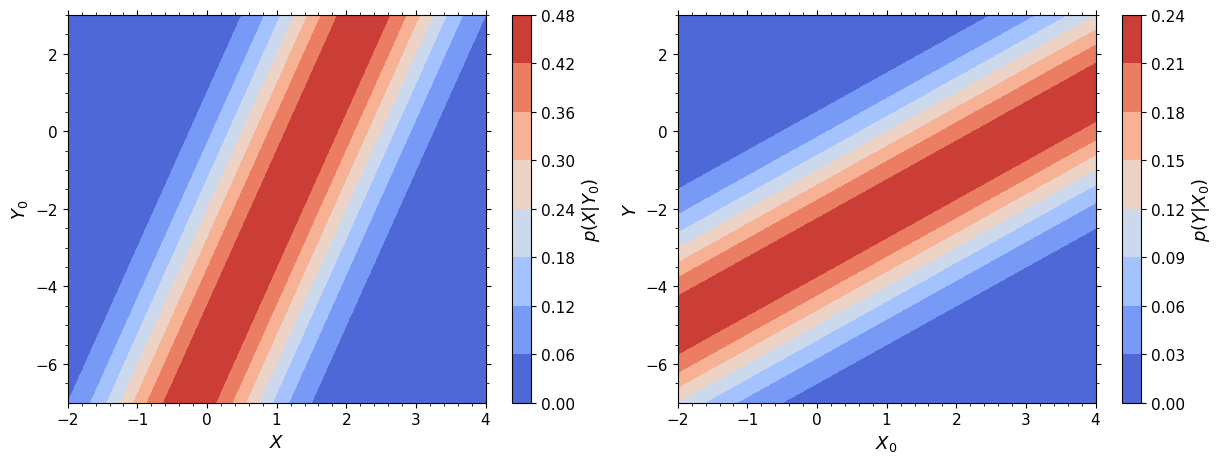

In [11]:
# Conditionals
x = np.linspace(-2,4,200)
y = np.linspace(-7,3,200)
X, Y = np.meshgrid(x,y)
x, y = X.T, Y.T
pos = np.dstack((x,y))

z = pdf.pdf(pos)

z_XgivY = z / Y_marg.pdf( y )
z_YgivX = z / X_marg.pdf( x )

fig, ax = plt.subplots(1, 2, figsize=(12.4, 4.8) )

im = ax[0].contourf( x, y, z_XgivY, cmap='coolwarm' )
cb = fig.colorbar(im, ax=ax[0])
ax[0].set_xlabel('$X$')
ax[0].set_ylabel('$Y_0$')
cb.set_label('$p(X|Y_0)$')

im = ax[1].contourf( x, y, z_YgivX, cmap='coolwarm' )
cb = fig.colorbar(im, ax=ax[1])
ax[1].set_xlabel('$X_0$')
ax[1].set_ylabel('$Y$')
cb.set_label('$p(Y|X_0)$')

# End of Lecture 6

By the end of this lecture you should:
- Understand, be able to use, compute the properties of and manipulate the Binomial, Poisson, normal and multivariate-normal distributions